# Week4 - Lab

### Complete _todo_ parts in the following:

Team Names:
Sai Chaitanya Varma Indukuri,
Hemanth Gorapalli,
Gudivada Charan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [3]:
df.head()

,X1,X2,y
0,0.000000,B,3.782042
1,0.000628,B,4.579489
2,0.001257,B,2.569297
3,0.001885,A,6.597301
4,0.002514,B,-2.071547


<Axes: title={'center': 'x1 vs y'}, xlabel='X1', ylabel='y'>

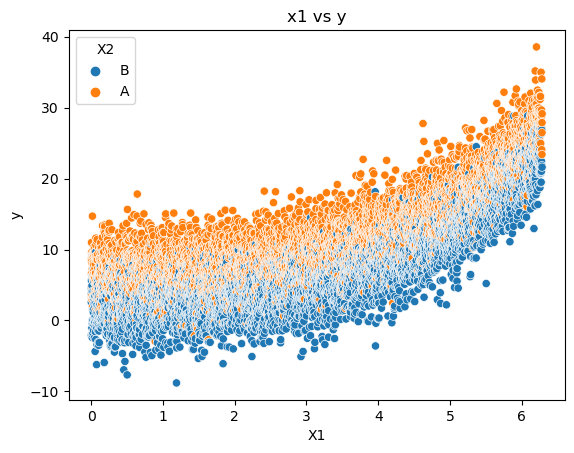

In [4]:
# todo: add a proper title
plt.title('x1 vs y')
sns.scatterplot(data=df, x='X1', y='y', hue='X2')

<Axes: title={'center': 'x1 vs y for random samples'}, xlabel='X1', ylabel='y'>

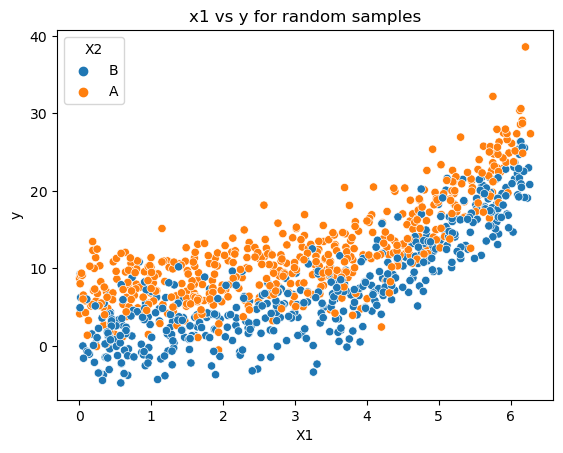

In [5]:
# todo: add the same title as above

plt.title('x1 vs y for random samples')
sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo:
explain findings in the graphs

In [6]:
#Findings
# The y numerical variable is changed to categorical variable based on the given condition.
# When plotted the input against the y values, A or B categories are determined based on the value it outputs
# The graph seems to be a curved fit and the Linear Regression with categorical variables
# and regularisation can be used to build the model
X = df[['X1', 'X2']]
y = df.y

In [7]:
X.head()

,X1,X2
0,0.000000,B
1,0.000628,B
2,0.001257,B
3,0.001885,A
4,0.002514,B


In [8]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y)

0.5794986357616547

In [9]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5794986357616547

Text(0.5, 1.0, 'Relationship between X1 and y')

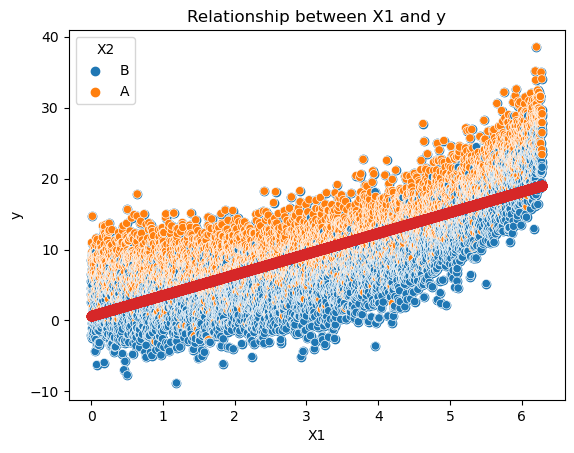

In [10]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
plt.scatter(X.X1, y)
plt.scatter(X.X1, y_pred)

# todo: add a proper title
sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X.X1, y_pred)
plt.title('Relationship between X1 and y')

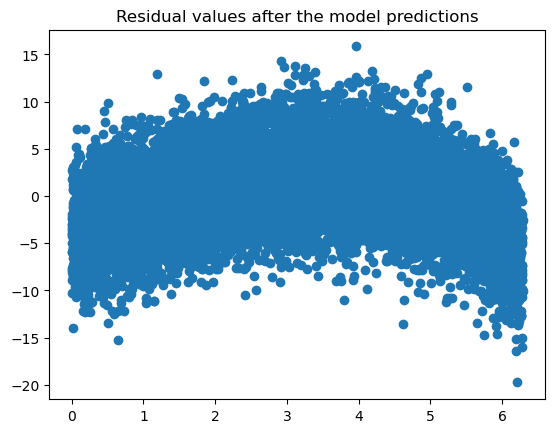

In [11]:
# todo: add a proper title
plt.title('Residual values after the model predictions')
plt.scatter(X.X1, y_pred-y)

<Axes: title={'center': 'Residual values of a histogram'}>

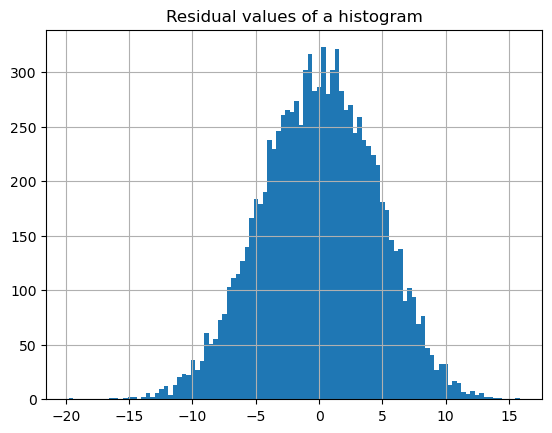

In [12]:
# todo: add a proper title
plt.title('Residual values of a histogram')
(y_pred-y).hist(bins=100)

#### Todo:
Explain findings in the graphs above & what we can try next

In [13]:
# todo: explain the code below, what we do & why we do it?

transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y)

#Explanation
# Adding a new feature that can actually increase the predictability of the previous model.
# Here, a polynomial feature with degree 2 is introduced. This increased the accuracy from 67 to 78

0.6788120493555598

In [14]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6788120493555598

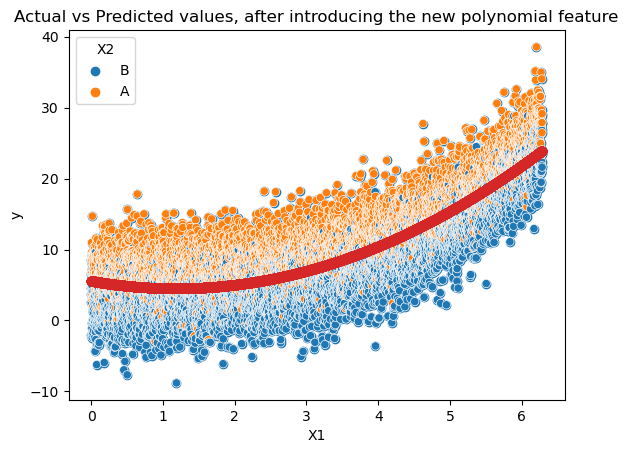

In [15]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
plt.scatter(X_data[:, 1], y)
plt.scatter(X_data[:, 1], y_pred)


# todo: add a proper title
plt.title('Actual vs Predicted values, after introducing the new polynomial feature')
sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X.X1, y_pred)

<Axes: title={'center': 'Residual values after introducing the new polynomial feature'}>

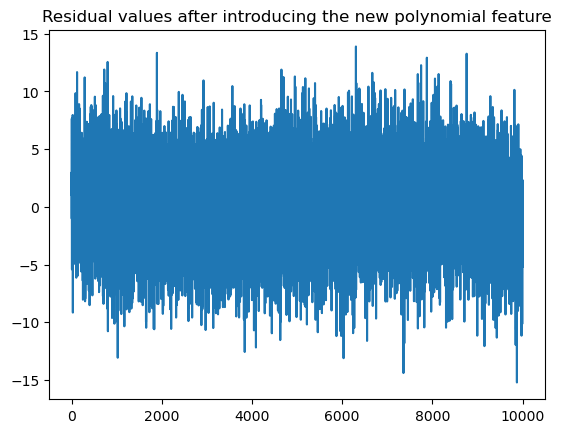

In [16]:
# todo: add a proper title
plt.title('Residual values after introducing the new polynomial feature')
(y_pred-y).plot()

<Axes: title={'center': 'Histogram of Residual values after introducing the new polynomial feature'}>

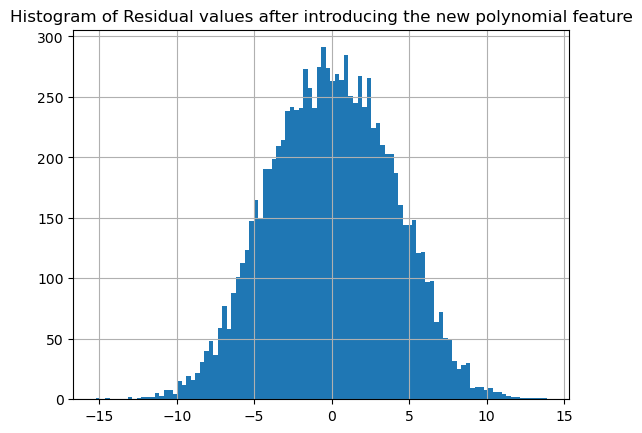

In [17]:
# todo: add a proper title
plt.title('Histogram of Residual values after introducing the new polynomial feature')
(y_pred-y).hist(bins=100)

### Todo:
Explain findings in the above graphs & what can we do next?
Explain findings in the above graphs & what can we do next?

Correlation between Variables: The graphs likely include scatter plots or other visualizations that depict the relationship between pairs of variables. These plots help in understanding how the variables are related to each other. For example, they might show how one variable changes concerning another, revealing patterns or trends in the data.

Fitness of Prediction Model: This part likely includes graphs that assess the performance of a prediction model on the dataset. It might involve comparing actual values with predicted values generated by the model. A high fitness indicates that the model's predictions closely match the actual data points. On the other hand, a low fitness suggests that the model may not accurately capture the underlying patterns in the data.

Errors in Prediction: The graphs may visualize errors or residuals generated by the prediction model. These errors represent the differences between the actual values and the predicted values. By examining the spread of errors, we can identify regions where the model performs well and areas where it struggles to make accurate predictions.

Implications for Next Steps: Based on the analysis of the graphs, the next steps could involve further investigation into areas where the model exhibits larger errors. This exploration could help in understanding the factors contributing to inaccuracies in prediction. Additionally, it may be necessary to enhance the model's accuracy by refining its algorithms, incorporating additional features, or adjusting parameters.


##  Finally:

In [18]:
## to see the difference (leave these blocks commented when submitting)
encoder = OneHotEncoder()

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

pd.DataFrame(
    data=encoded.todense(),
    columns=encoder.get_feature_names_out()
).head()

,X2_A,X2_B
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [19]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [20]:
encoded_df = pd.DataFrame(
    data=encoded.todense(),
    columns=encoder.get_feature_names_out()
)

In [21]:
encoded_df.head()

,X2_B
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0


In [22]:
# todo: explain the code

numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,1.0
1,0.000628,1.0
2,0.001257,1.0
3,0.001885,0.0
4,0.002514,1.0


Explanation:


* Firstly, The OneHotEncoder is initialized without dropping any categories.
* Then,  the OneHotEncoder is initialized with the parameter 'drop='first'', which means it will drop the first category encountered in each feature to avoid multicollinearity.
* The resulting encoded data is converted into a DataFrame with column names obtained from the encoder.
* The first few rows of X_new are displayed, showing both the numerical 'X1' feature and the one-hot encoded 'X2' feature without the first category.


In [23]:
# todo: explain the code

poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y)

0.8051197123744386

In [24]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8051197123744386

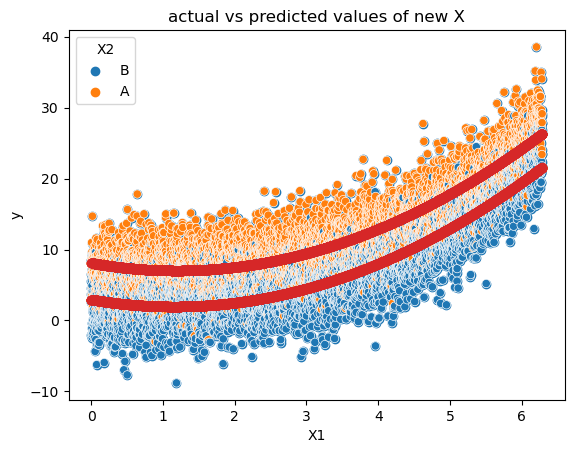

In [25]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
plt.scatter(X_new.X1, y)
plt.scatter(X_new.X1, y_pred)

# todo: add a proper title
plt.title('actual vs predicted values of new X')
sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X_new.X1, y_pred)

<Axes: title={'center': 'Residual values plot for the new X predictions'}>

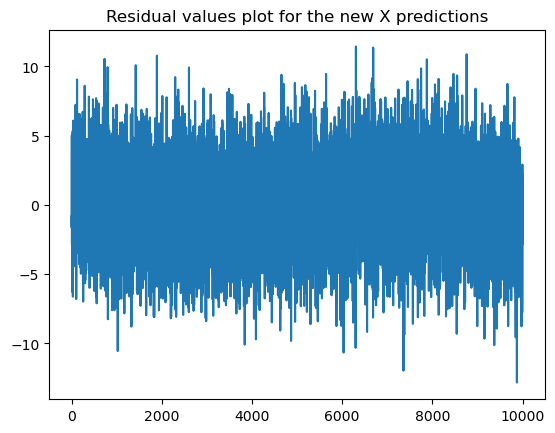

In [26]:
# todo: add a proper title
plt.title('Residual values plot for the new X predictions')
(y_pred-y).plot()

<Axes: title={'center': 'Histogram of Residual values for the new X predictions'}>

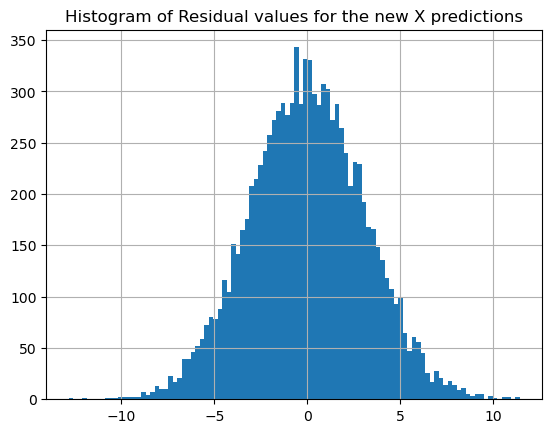

In [27]:
# todo: add a proper title
plt.title('Histogram of Residual values for the new X predictions')
(y_pred-y).hist(bins=100)

#### Todo:
explain results

## Create a train-test split

In [28]:
X_training, X_test, y_training, y_test = train_test_split(X,y)#code

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set.
 * Get the r2_score on the test set.

 Important note: When transforming use `transform` NOT `fit_transform`

 __eg:__ `encoded = encoder.transform(X_test[categorical_features])`
     

In [29]:
# code
linear_regression_model = LinearRegression()
X_training_copy = X_training.copy()
X_training_copy['isB'] = [1 if x == 'B' else 0 for x in X_training_copy['X2']]
X_training_copy.drop('X2', axis=1, inplace=True)
linear_regression_model.fit(X_training_copy, y_training)
y_training_pred = linear_regression_model.predict(X_training_copy)
X_test_copy = X_test.copy()
X_test_copy['isB'] = [1 if x == 'B' else 0 for x in X_test_copy['X2']]
X_test_copy.drop('X2', axis=1, inplace=True)
y_test_pred = linear_regression_model.predict(X_test_copy)

r2_test_score = r2_score(y_test, y_test_pred)
print(f'R^2 Score on Test Set: {r2_test_score:.4f}')

R^2 Score on Test Set: 0.7135


## Create a pipeline

Add comments to `todo` parts

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# todo
#adding polynomial features to the pipeline of degree 2
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# todo
#this categorical pipeline creates new columns using OneHotEncoder and drops the first column as they are redundant
#handle_unknown='ignore' ignores the columns that are not specified before
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# todo
#this step cmbines the both numerical and categorical pipelines
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [31]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [32]:
modeling_pipeline.score(X_test, y_test)

0.8077929139583486

## Evaluate/create residual plots

In [33]:
y_pred = modeling_pipeline.predict(X_test)

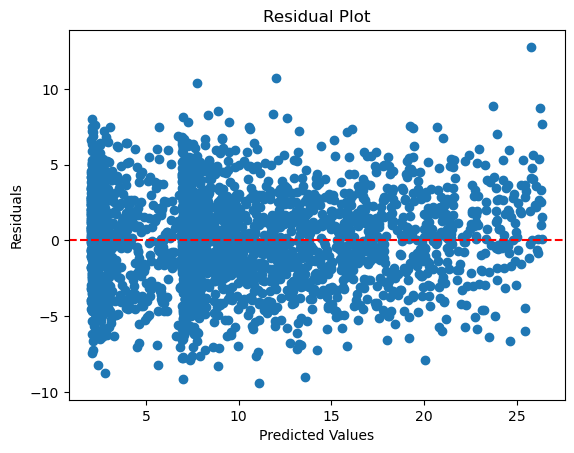

In [34]:
# cod# code
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--') #adding x=0 line to check the residuals
plt.show()

## Explain findings

Explain findings